In [1]:
# Titanic Survival Predictor

In [2]:
# Run only ONCE: Install necessary Python libraries

# Install pandas for data manipulation
#!pip install pandas

# Install scikit-learn for machine learning models and metrics
#!pip install scikit-learn

# Install matplotlib for plotting the ROC curve
#!pip install matplotlib


In [2]:
# Load necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [4]:
# Load the Titanic dataset

file_path = 'Titanic_Data.csv'
titanic_df = pd.read_csv(file_path)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# Step 1: Identify columns with missing values
missing_values = titanic_df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [8]:
# Step 2: Drop irrelevant columns
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [10]:
# Step 3: Handle missing values
# Fill missing 'Age' values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df.head(10)

/var/folders/00/vgy_4mc93g5f7prkg3kp7jw80000gn/T/ipykernel_29237/3575245103.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,28.0,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [12]:
# Make sure there are no more missing values
missing_values = titanic_df.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])

Columns with missing values:
 Series([], dtype: int64)


In [14]:
# Step 4:
# Convert 'Sex' column: male = 1, female = 0
titanic_df['Sex'] = titanic_df['Sex'].astype(str).str.strip().map({'male': 1, 'female': 0})
titanic_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
5,0,3,1,28.0,0,0,8.4583
6,0,1,1,54.0,0,0,51.8625
7,0,3,1,2.0,3,1,21.0750
8,1,3,0,27.0,0,2,11.1333
9,1,2,0,14.0,1,0,30.0708


In [16]:
# Convert appropriate variables to categorical and numeric (by default they aare alll strings to beginn with
# Convert 'Survived', 'Pclass', 'Sex', and 'Embarked' to categorical variables
titanic_df['Survived'] = pd.Categorical(titanic_df['Survived'])
titanic_df['Pclass'] = pd.Categorical(titanic_df['Pclass'])
titanic_df['Sex'] = pd.Categorical(titanic_df['Sex'])

# Convert 'Age', 'SibSp', 'Parch', and 'Fare' to numerical variables
titanic_df['Age'] = pd.to_numeric(titanic_df['Age'], errors='coerce')
titanic_df['SibSp'] = pd.to_numeric(titanic_df['SibSp'], errors='coerce')
titanic_df['Parch'] = pd.to_numeric(titanic_df['Parch'], errors='coerce')
titanic_df['Fare'] = pd.to_numeric(titanic_df['Fare'], errors='coerce')

In [18]:
# Step 5: Split the data into features and target variable
X = titanic_df.drop('Survived', axis=1)  # Features
#X = pd.get_dummies(X, drop_first=True)
y = titanic_df['Survived']  # Target variable
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
5,3,1,28.0,0,0,8.4583
6,1,1,54.0,0,0,51.8625
7,3,1,2.0,3,1,21.0750
8,3,0,27.0,0,2,11.1333
9,2,0,14.0,1,0,30.0708


In [20]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Step 7: Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
trained_model = model.fit(X_train, y_train)

In [24]:
# Step 8: Make predictions on the test set
y_pred = trained_model.predict(X_test)
y_pred_proba = trained_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

In [26]:
# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

In [28]:
# Display the results
print("Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc)


Model Performance Metrics:
Accuracy: 0.7541899441340782
Precision: 0.7027027027027027
Recall: 0.7027027027027027
F1-Score: 0.7027027027027027
AUC: 0.772007722007722


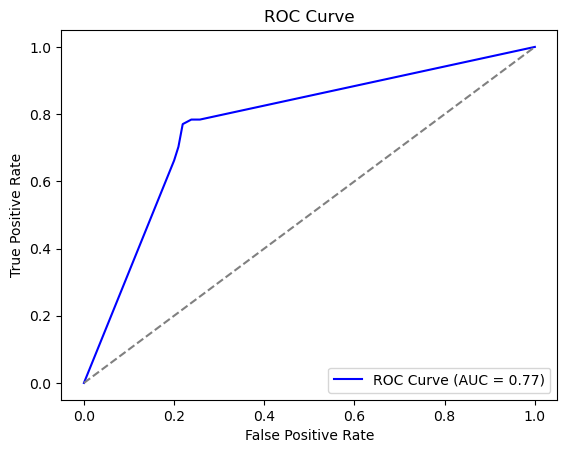

In [30]:
# Step 10: Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [32]:
import pickle


In [42]:
# Save ML Model as serialized persistent object
ml_model = 'titanic_predictor.sav'
pickle.dump(trained_model, open(ml_model, 'wb'))

In [ ]:
# Following part of the code will be a separate program as pure Python program
# and NOT Jupyter Notebook code ... let's say tytanic_predict.py

# Streamlit code for UI to accept user inputs

In [40]:
# Load persistent ML model object and use for prediction
#loaded_model = pickle.load(open('titanic_predictor.sav', 'rb'))

# Predict using the ML Model
#prediction = loaded_model.predict(single_sample)

In [ ]:
# After this you will at the terminal
# streamlit run tytanic_predict.py